In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency

In [46]:
# Load data and inspect it
heart = pd.read_csv('heart.txt')
heart.to_csv(r'heart.csv', index=None)

print(heart.head())

    age     sex  trestbps   chol                cp  exang  fbs  thalach  \
0  63.0    male     145.0  233.0    typical angina    0.0  1.0    150.0   
1  67.0    male     160.0  286.0      asymptomatic    1.0  0.0    108.0   
2  67.0    male     120.0  229.0      asymptomatic    1.0  0.0    129.0   
3  37.0    male     130.0  250.0  non-anginal pain    0.0  0.0    187.0   
4  41.0  female     130.0  204.0   atypical angina    0.0  0.0    172.0   

  heart_disease  
0       absence  
1      presence  
2      presence  
3       absence  
4       absence  


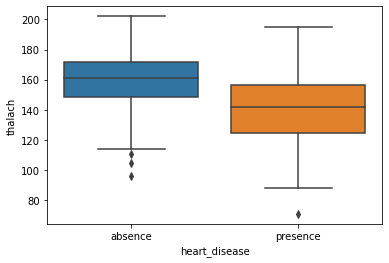

In [28]:
# Plot highest heart rate during exercise test vs. diagnosis
sns.boxplot(x=heart.heart_disease, y=heart.thalach)
plt.show()

In [32]:
# Apparently there is a relationship between the variables. We will confirm it with a 2-sample T-test, threshold=0.05

thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']
print(np.mean(thalach_hd) - np.mean(thalach_no_hd))

tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(pval)

-19.11905597473242
3.456964908430172e-14


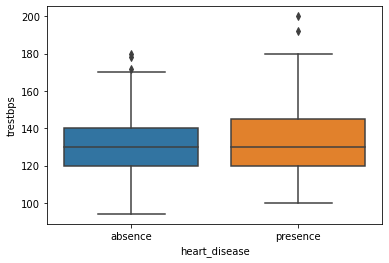

0.008548268928594928


In [34]:
# In the same way, we will explore if there's a relationship between the diagnosis and trestbps
trest_p = heart.trestbps[heart.heart_disease == 'presence']
trest_a = heart.trestbps[heart.heart_disease == 'absence']

plt.clf()
sns.boxplot(x=heart.heart_disease, y=heart.trestbps)
plt.show()

tstat, pval2 = ttest_ind(trest_p, trest_a)
print(pval2)

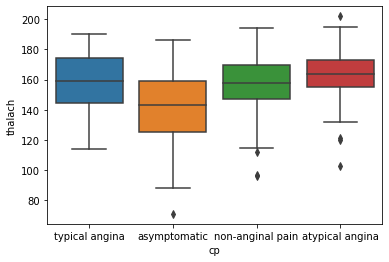

P value: 1.9065505247705008e-10
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


In [39]:
# Now we analyze the relationship between thalach and cp. Since we have more than two categorical variables and the standard deviations
# of the groups are very similar, we will use an ANOVA test to see if the relationship between the variables is statistically significant and a
#  Tukey HSD to determine wich pairs are different.
plt.clf()
sns.boxplot(x=heart.cp, y=heart.thalach)
plt.show()

thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

fstat, pval3 = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
print('P value:', pval3)

tukey = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)
print(tukey)

In [40]:
# Finally, we investigate the relationship bewtween cp and diagnosis through a chi-squared test because these variables are categorical

Xtab = pd.crosstab(heart.heart_disease, heart.cp)
print(Xtab)

chi2, pval, dof, expected = chi2_contingency(Xtab)
print(pval)

cp             asymptomatic  atypical angina  non-anginal pain  typical angina
heart_disease                                                                 
absence                  39               41                68              16
presence                105                9                18               7
1.2517106007837527e-17
